# Pandas 시각화
판다스 자체적으로 matplotlib 를 기반으로 한 시각화기능을 지원한다.    
Series나 DataFrame에 plot() 함수나 plot accessor를 사용한다.    
matplotlib을 이용해 그래프에 대한 설정을 추가로 할 수 있다.
- https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html

## plot() 
- kind 매개변수에 지정한 값에 따라 다양한 그래프를 그릴 수 있다.
- **kind** : 그래프 종류 지정
    - **'line'**: line plot (default)
    - **'bar'**: vertical bar plot
    - **'barh'**: horizontal bar plot
    - **'hist'**: histogram
    - **'box'**: boxplot
    - **'kde'**: Kernel Density Estimation plot
    - **'pie'**: pie plot
    - **'scatter'**: scatter plot

## 막대 그래프
- index가 무슨 값인지를 가리키는 축으로 사용된다. ==> 라벨로 사용

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

tips = pd.read_csv('data/tips.csv')
tips.shape

(244, 7)

In [4]:
tips['sex'].value_counts()

sex
Male      157
Female     87
Name: count, dtype: int64

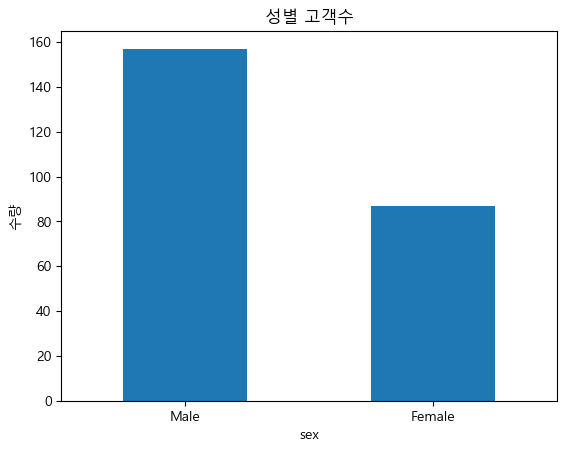

In [8]:
# 성별 고객수
v = tips['sex'].value_counts()
## Series값으로 그래프를 그릴 때 index name을 한축(x), 값을 다른 한축(y)에 놓는다.
v.plot(kind='bar', rot=0) 

# pandas는 내부적으로 matplotlib 사용해서 그래프를 그린다.
# 그래서 추가 설정은 plot()의 파라미터로 전달  또는 matplotlib의 함수 사용할 수있다.
plt.title("성별 고객수")
plt.ylabel("수량")
plt.show()

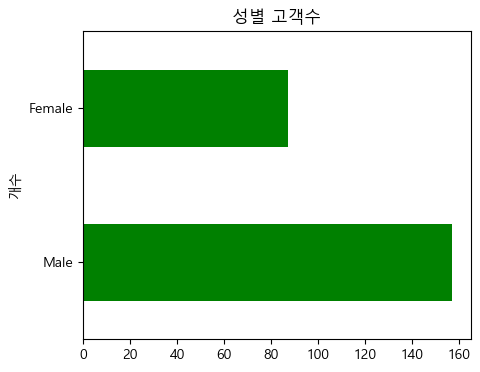

In [9]:
v.plot(kind='barh', title="성별 고객수", ylabel='개수', figsize=(5, 4), color="green")
plt.show()

In [10]:
# 성별-흡연여부별 손님 수
result = tips.pivot_table(index="sex", columns="smoker", values="total_bill", aggfunc="count")
result

smoker,No,Yes
sex,,
Female,54,33
Male,97,60


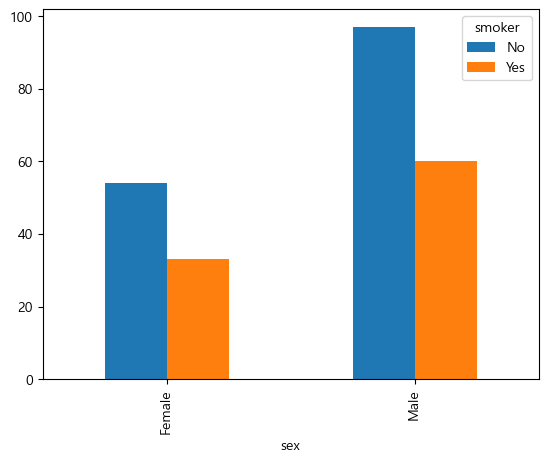

In [ ]:
# 하나의 값으로(series) 그래프를 그리는 함수.
## DataFrame.plot() => 컬럼별로 그린다.
result.plot(kind='bar')
plt.show() # 나눠진것도 수량적으로 비교교

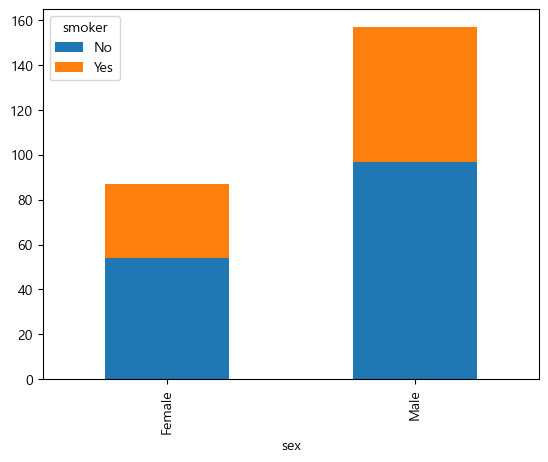

In [ ]:
result.plot(
    kind='bar', 
    stacked=True #  막대: 전체 개수, smoker 별 비율로 나눠줌.
)
plt.show() # 비율적으로 비교

In [13]:
result = tips.pivot_table(index="smoker", columns='day', values='total_bill', aggfunc="sum")
result

day,Fri,Sat,Sun,Thur
smoker,,,,
No,73.68,884.78,1168.88,770.09
Yes,252.20,893.62,458.28,326.24


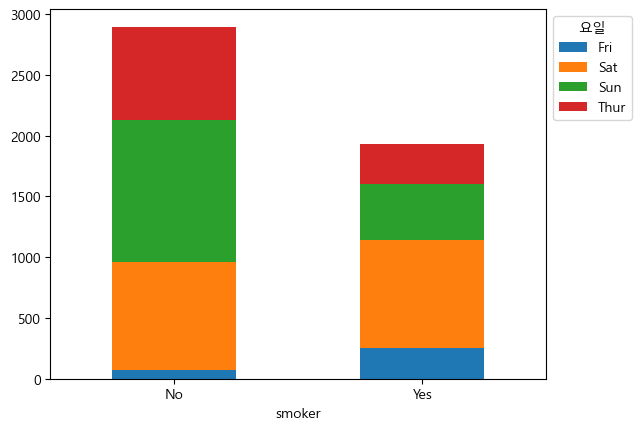

In [14]:
# result.plot(kind='bar')
result.plot(kind='bar', stacked=True, rot=0)
plt.legend(bbox_to_anchor=(1,1), loc="upper left", title="요일")
plt.show()

## 파이차트

In [15]:
tips['day'].value_counts()

day
Sat     87
Sun     76
Thur    62
Fri     19
Name: count, dtype: int64

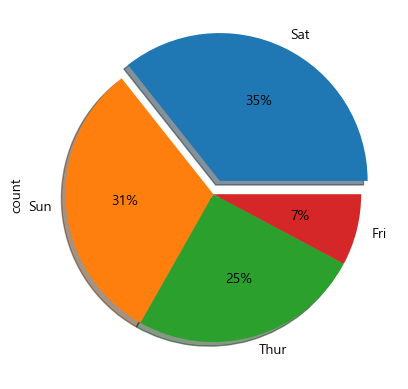

In [16]:
tips['day'].value_counts().plot(
    kind='pie', autopct="%d%%",
    explode=[0.1, 0, 0, 0], shadow=True
)
plt.show()

## 히스토그램, KDE(밀도그래프)

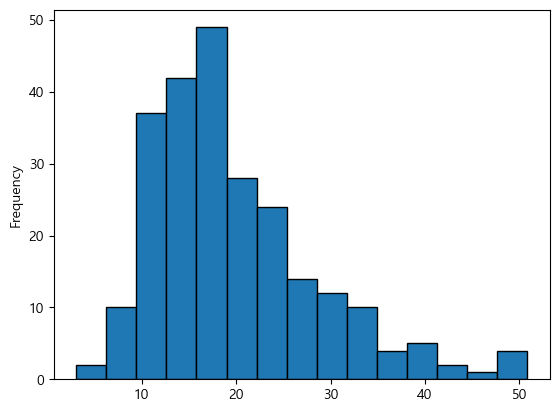

In [17]:
tips['total_bill'].plot(
    kind="hist", 
    bins=15, 
    edgecolor="k"
)
plt.show()

In [19]:
%pip install scipy

   ---------------------------------------- 0.0/40.9 MB ? eta -:--:--
   ---- ----------------------------------- 4.5/40.9 MB 22.3 MB/s eta 0:00:02
   ---------- ----------------------------- 10.5/40.9 MB 29.7 MB/s eta 0:00:02
   ------------ --------------------------- 12.8/40.9 MB 20.1 MB/s eta 0:00:02
   ---------------------- ----------------- 22.8/40.9 MB 27.2 MB/s eta 0:00:01
   ---------------------------- ----------- 29.1/40.9 MB 28.0 MB/s eta 0:00:01
   ------------------------------------ --- 37.0/40.9 MB 29.4 MB/s eta 0:00:01
   ---------------------------------------- 40.9/40.9 MB 28.6 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


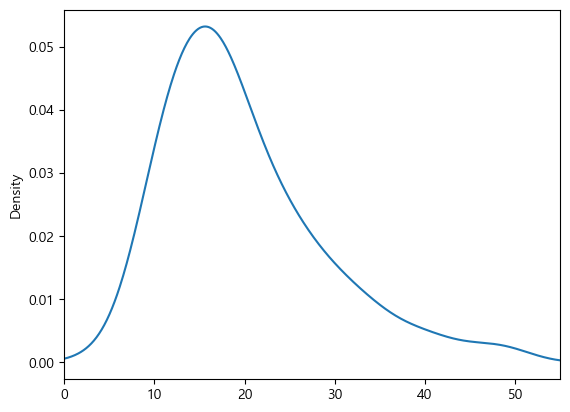

In [20]:
tips['total_bill'].plot(kind="kde") 
plt.xlim(0, 55)
plt.show()

In [22]:
tips[['tip', 'total_bill']]

,tip,total_bill
0,1.01,16.99
1,1.66,10.34
2,3.50,21.01
3,3.31,23.68
4,3.61,24.59
...,...,...
239,5.92,29.03
240,2.00,27.18
241,2.00,22.67
242,1.75,17.82


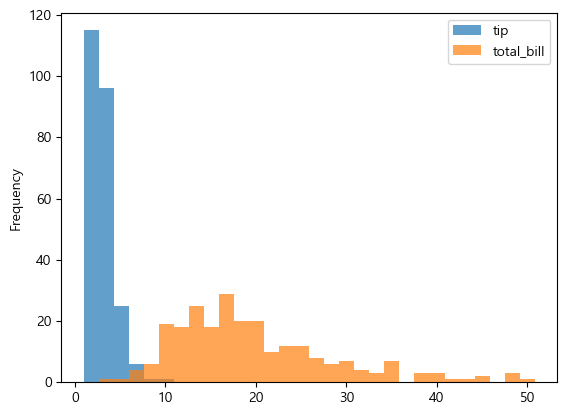

In [ ]:
tips[['tip', 'total_bill']].plot(kind='hist', alpha=0.7, bins=30) #겹치는 것이 있을땐 alpha 설정할것.
plt.show()

## Boxplot (상자그래프)

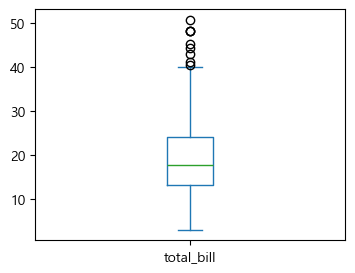

In [27]:
tips['total_bill'].plot(kind="box", figsize=(4, 3))
plt.show()

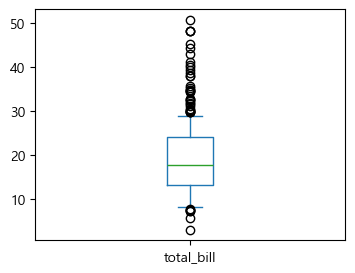

In [26]:
tips['total_bill'].plot(kind="box", whis=0.5, figsize=(4, 3))
plt.show()

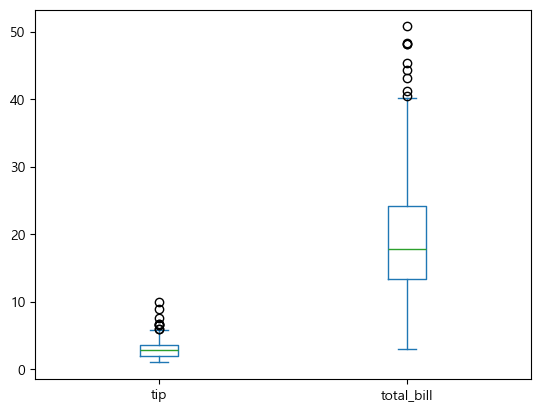

In [25]:
tips[['tip', 'total_bill']].plot(kind="box")
plt.show()

## scatter plot (산점도) 

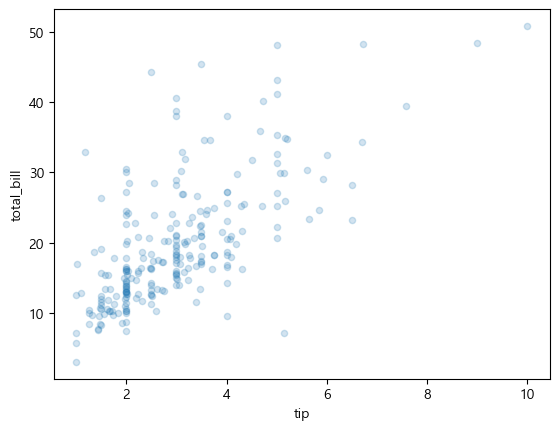

In [28]:
tips.plot(kind="scatter", x="tip", y="total_bill", alpha=0.2)
plt.show()

In [29]:
tips[['tip', 'total_bill']].corr()

,tip,total_bill
tip,1.000000,0.675734
total_bill,0.675734,1.000000


In [30]:
dia = pd.read_csv("data/diamonds.csv")
v = dia.select_dtypes(include="number").corr()
v

,carat,depth,table,price,x,y,z
carat,1.000000,0.028224,0.181618,0.921591,0.975094,0.951722,0.953387
depth,0.028224,1.000000,-0.295779,-0.010647,-0.025289,-0.029341,0.094924
table,0.181618,-0.295779,1.000000,0.127134,0.195344,0.183760,0.150929
price,0.921591,-0.010647,0.127134,1.000000,0.884435,0.865421,0.861249
x,0.975094,-0.025289,0.195344,0.884435,1.000000,0.974701,0.970772
y,0.951722,-0.029341,0.183760,0.865421,0.974701,1.000000,0.952006
z,0.953387,0.094924,0.150929,0.861249,0.970772,0.952006,1.000000


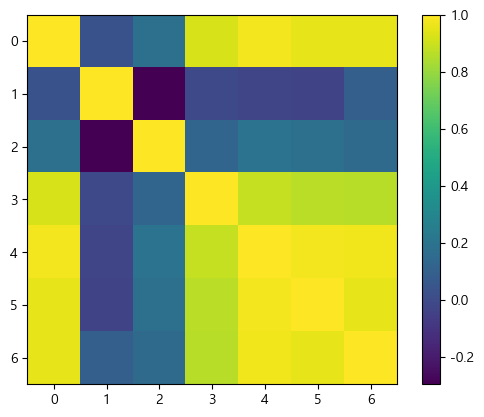

In [31]:
plt.imshow(v)#, cmap="Blues")
plt.colorbar()
plt.show()

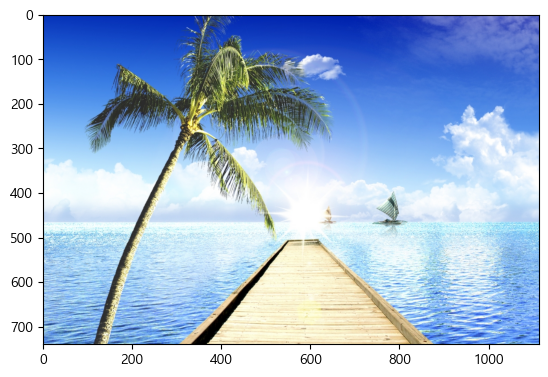

In [32]:
# plt.imshow() : 원래 기능 - 이미지출력
from PIL import Image
import numpy as np
img = np.array(Image.open("image.jpg"))
plt.imshow(img)
plt.show()

# line plot

In [33]:
df = pd.read_excel("data/강수량.xlsx", index_col="계절").T
df

계절,봄,여름,가을,겨울
2009,231.3,752.0,143.1,142.3
2010,302.9,692.6,307.6,98.7
2011,256.9,1053.6,225.5,45.6
2012,256.5,770.6,363.5,139.3
2013,264.3,567.5,231.2,59.9
2014,215.9,599.8,293.1,76.9
2015,223.2,387.1,247.7,109.1
2016,312.8,446.2,381.6,108.1
2017,118.6,609.7,172.5,75.6


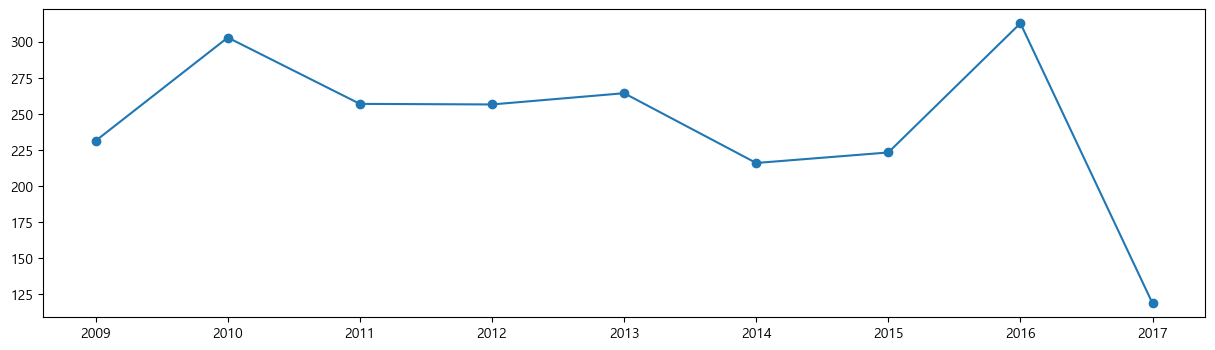

In [34]:
df['봄'].plot(figsize=(15, 4), marker="o")
plt.show()

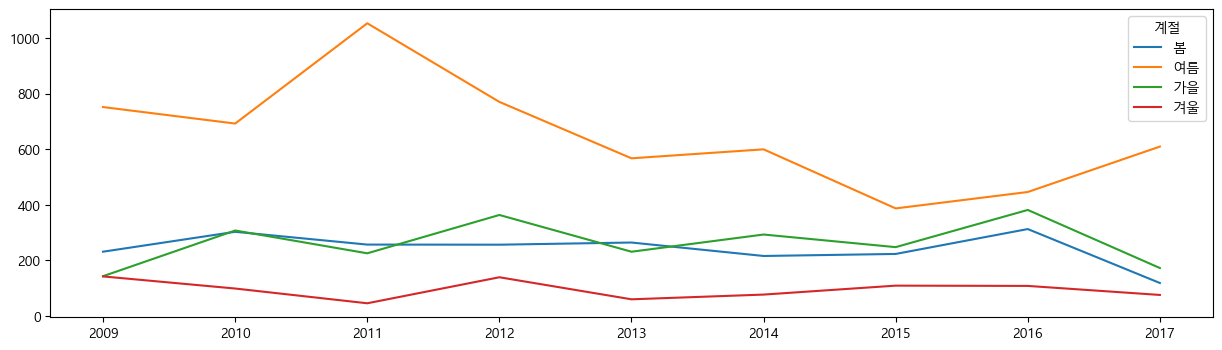

In [35]:
df.plot(figsize=(15,4))
plt.show()

In [36]:
df.T

,2009,2010,2011,2012,2013,2014,2015,2016,2017
계절,,,,,,,,,
봄,231.3,302.9,256.9,256.5,264.3,215.9,223.2,312.8,118.6
여름,752.0,692.6,1053.6,770.6,567.5,599.8,387.1,446.2,609.7
가을,143.1,307.6,225.5,363.5,231.2,293.1,247.7,381.6,172.5
겨울,142.3,98.7,45.6,139.3,59.9,76.9,109.1,108.1,75.6


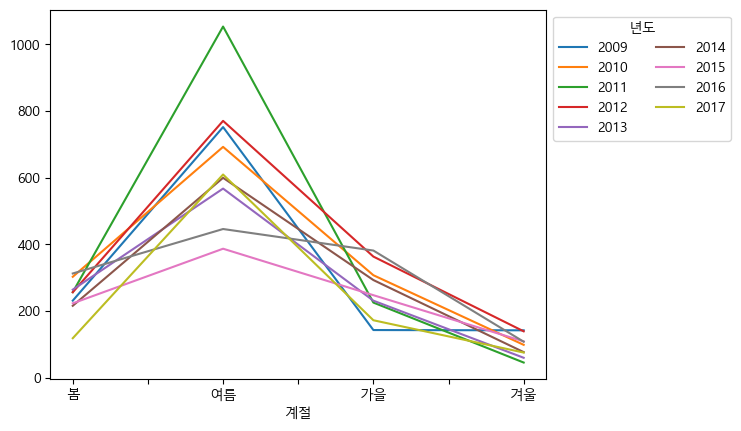

In [37]:
df.T.plot()
plt.legend(bbox_to_anchor=(1,1), loc="upper left", title="년도", ncols=2) # 2개 열로 나눠서.
plt.show()